<a href="https://colab.research.google.com/github/Prothoma2001/Bangla-Sign-Language-Recognition-Using-CNN/blob/main/Bangla_Sign_Language_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#dataset 2

Epoch 1/20
739/739 [==============================] - 11s 11ms/step - loss: 3.3354 - acc: 0.1365 - val_loss: 1.7339 - val_acc: 0.4968
Epoch 2/20
739/739 [==============================] - 8s 10ms/step - loss: 1.2384 - acc: 0.6340 - val_loss: 0.8350 - val_acc: 0.7247
Epoch 3/20
739/739 [==============================] - 8s 11ms/step - loss: 0.7130 - acc: 0.7785 - val_loss: 0.5798 - val_acc: 0.8053
Epoch 4/20
739/739 [==============================] - 8s 11ms/step - loss: 0.4729 - acc: 0.8500 - val_loss: 0.4774 - val_acc: 0.8511
Epoch 5/20
739/739 [==============================] - 8s 10ms/step - loss: 0.3354 - acc: 0.8959 - val_loss: 0.3741 - val_acc: 0.8882
Epoch 6/20
739/739 [==============================] - 8s 10ms/step - loss: 0.2834 - acc: 0.9121 - val_loss: 0.3529 - val_acc: 0.9040
Epoch 7/20
739/739 [==============================] - 8s 10ms/step - loss: 0.2142 - acc: 0.9296 - val_loss: 0.3250 - val_acc: 0.9179
Epoch 8/20
739/739 [==============================] - 8s 10ms/step -

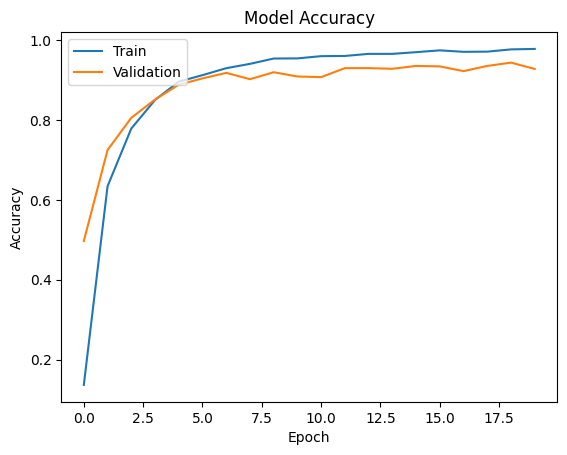

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import time

# Define the path to your dataset directory
dataset_path = "/content/drive/MyDrive/BdSL_OPSA22_STATIC2"

# Define the dimensions of your images
img_width, img_height = 64,64

# Define the batch size and number of epochs for training
batch_size = 8
epochs = 20

# Initialize lists to hold the data and labels
data = []
labels = []

# Loop over the dataset directory
for i, class_folder in enumerate(os.listdir(dataset_path)):
    class_folder_path = os.path.join(dataset_path, class_folder)
    # Loop over the images in each class folder
    for image_name in os.listdir(class_folder_path):
        image_path = os.path.join(class_folder_path, image_name)
        # Load the image, resize to the desired dimensions, and convert to gray scale
        image = cv2.imread(image_path)
        image = cv2.resize(image, (img_width, img_height))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # fix
        # Add the pre-processed image and its label to the lists
        data.append(image)
        labels.append(i)

# Convert the data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split the data and labels into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=42)

# Normalize the pixel values to be between 0 and 1
train_data = train_data.astype("float32") / 255.0
test_data = test_data.astype("float32") / 255.0

# Convert the labels to one-hot encoded vectors
num_classes = len(np.unique(labels))
train_labels = np.eye(num_classes)[train_labels]
test_labels = np.eye(num_classes)[test_labels]

#creating model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=train_data.shape[1:]))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

start_time = time.time()

# Train the model
history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_labels))

run_time1 = (time.time()- start_time)
print("-----%s seconds-----" % run_time1)

model.save("OurMainModel_1.h5")

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data, test_labels, batch_size=batch_size)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


# Plot the training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

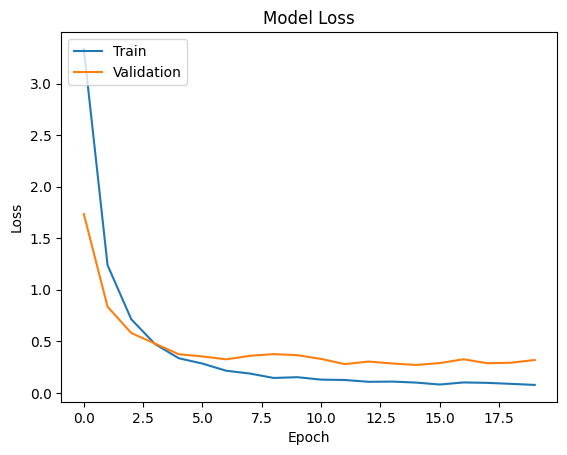

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the predicted class probabilities for the test set
y_pred = model.predict(test_data)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded test labels to class labels
y_true = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Compute the classification report
class_report = classification_report(y_true, y_pred)

# Print the results
print("Confusion matrix:\n", conf_matrix)
print("Classification report:\n", class_report)

80/80 [==============================] - 0s 4ms/step
Confusion matrix:
 [[50  0  0 ...  0  0  0]
 [ 0 30  0 ...  0  0  0]
 [ 0  0 37 ...  1  0  0]
 ...
 [ 0  0  0 ... 43  0  1]
 [ 0  0  1 ...  0 27  0]
 [ 0  0  0 ...  0  0 70]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        54
           1       0.91      0.88      0.90        34
           2       0.84      0.95      0.89        39
           3       0.95      0.86      0.91        73
           4       0.92      0.95      0.93        59
           5       0.91      0.93      0.92        43
           6       0.84      0.86      0.85        37
           7       1.00      0.75      0.86        53
           8       0.71      0.85      0.77        20
           9       1.00      0.92      0.96        61
          10       0.93      0.96      0.95        55
          11       0.93      0.95      0.94        57
          12       0.92      0.94      0.93  

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(test_labels.argmax(axis=1), y_pred)

# Compute the sensitivity and specificity
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 1.0
Specificity: 1.0


In [ ]:
predictions = model.predict(test_data)
test_labels = np.argmax(test_labels, axis=1)
predictions = np.argmax(predictions, axis=1)
from sklearn.metrics import classification_report
report = classification_report(test_labels, predictions)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(test_labels, predictions)

for i in range(num_classes):
    tp = confusion[i, i]
    fp = np.sum(confusion[:, i]) - tp
    fn = np.sum(confusion[i, :]) - tp
    tn = np.sum(confusion) - tp - fp - fn
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print("Class {}: Sensitivity = {:.2f}, Specificity = {:.2f}, Accuracy = {:.2f}".format(i, sensitivity, specificity, accuracy)) 

80/80 [==============================] - 0s 4ms/step
Class 0: Sensitivity = 0.93, Specificity = 1.00, Accuracy = 1.00
Class 1: Sensitivity = 0.88, Specificity = 1.00, Accuracy = 1.00
Class 2: Sensitivity = 0.95, Specificity = 1.00, Accuracy = 1.00
Class 3: Sensitivity = 0.86, Specificity = 1.00, Accuracy = 0.99
Class 4: Sensitivity = 0.95, Specificity = 1.00, Accuracy = 1.00
Class 5: Sensitivity = 0.93, Specificity = 1.00, Accuracy = 1.00
Class 6: Sensitivity = 0.86, Specificity = 1.00, Accuracy = 1.00
Class 7: Sensitivity = 0.75, Specificity = 1.00, Accuracy = 0.99
Class 8: Sensitivity = 0.85, Specificity = 1.00, Accuracy = 1.00
Class 9: Sensitivity = 0.92, Specificity = 1.00, Accuracy = 1.00
Class 10: Sensitivity = 0.96, Specificity = 1.00, Accuracy = 1.00
Class 11: Sensitivity = 0.95, Specificity = 1.00, Accuracy = 1.00
Class 12: Sensitivity = 0.94, Specificity = 1.00, Accuracy = 1.00
Class 13: Sensitivity = 0.88, Specificity = 1.00, Accuracy = 1.00
Class 14: Sensitivity = 0.93, Spe

In [ ]:
#dataset 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Epoch 1/20
2135/2135 [==============================] - 26s 10ms/step - loss: 1.5080 - acc: 0.5902 - val_loss: 0.2516 - val_acc: 0.9154
Epoch 2/20
2135/2135 [==============================] - 22s 10ms/step - loss: 0.2688 - acc: 0.9138 - val_loss: 0.1558 - val_acc: 0.9422
Epoch 3/20
2135/2135 [==============================] - 21s 10ms/step - loss: 0.1789 - acc: 0.9415 - val_loss: 0.1407 - val_acc: 0.9579
Epoch 4/20
2135/2135 [==============================] - 21s 10ms/step - loss: 0.1323 - acc: 0.9545 - val_loss: 0.1182 - val_acc: 0.9621
Epoch 5/20
2135/2135 [==============================] - 24s 11ms/step - loss: 0.1158 - acc: 0.9620 - val_loss: 0.1298 - val_acc: 0.9647
Epoch 6/20
2135/2135 [==============================] - 21s 10ms/step - loss: 0.1021 - acc: 0.9659 - val_loss: 0.0827 - val_acc: 0.9753
Epoch 7/20
2135/2135 [==============================] - 24s 11ms/step - loss: 0.0826 - acc: 0.9729 - val_loss: 0.0925 - val_acc: 0.9705
Epoch 8/20
2135/2135 [==========================

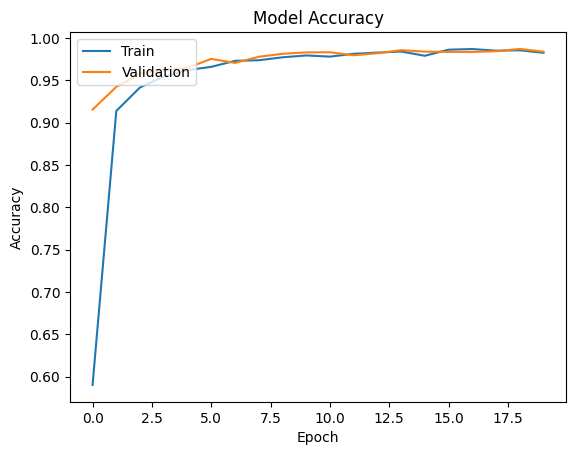

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import time

# Define the path to your dataset directory
dataset_path = "/content/drive/MyDrive/BdSL_OPSA22_STATIC1"

# Define the dimensions of your images
img_width, img_height = 64,64

# Define the batch size and number of epochs for training
batch_size = 8
epochs = 20

# Initialize lists to hold the data and labels
data = []
labels = []

# Loop over the dataset directory
for i, class_folder in enumerate(os.listdir(dataset_path)):
    class_folder_path = os.path.join(dataset_path, class_folder)
    # Loop over the images in each class folder
    for image_name in os.listdir(class_folder_path):
        image_path = os.path.join(class_folder_path, image_name)
        # Load the image, resize to the desired dimensions, and convert to gray scale
        image = cv2.imread(image_path)
        image = cv2.resize(image, (img_width, img_height))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # fix
        # Add the pre-processed image and its label to the lists
        data.append(image)
        labels.append(i)

# Convert the data and labels lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Split the data and labels into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=42)

# Normalize the pixel values to be between 0 and 1
train_data = train_data.astype("float32") / 255.0
test_data = test_data.astype("float32") / 255.0

# Convert the labels to one-hot encoded vectors
num_classes = len(np.unique(labels))
train_labels = np.eye(num_classes)[train_labels]
test_labels = np.eye(num_classes)[test_labels]

#creating model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=train_data.shape[1:]))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])

start_time = time.time()

# Train the model
history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_labels))

run_time1 = (time.time()- start_time)
print("-----%s seconds-----" % run_time1)

model.save("OurMainModel_2.h5")

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data, test_labels, batch_size=batch_size)
print("Test loss:", loss)
print("Test accuracy:", accuracy)


# Plot the training and validation accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

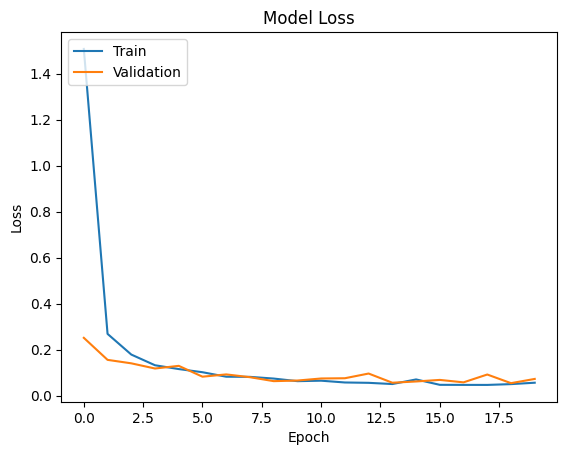

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get the predicted class probabilities for the test set
y_pred = model.predict(test_data)

# Convert the predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Convert the one-hot encoded test labels to class labels
y_true = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Compute the classification report
class_report = classification_report(y_true, y_pred)

# Print the results
print("Confusion matrix:\n", conf_matrix)
print("Classification report:\n", class_report)

229/229 [==============================] - 1s 4ms/step
Confusion matrix:
 [[138   0   0 ...   0   0   0]
 [  1  77   0 ...   0   0   0]
 [  0   0  98 ...   0   0   0]
 ...
 [  0   0   0 ... 128   0   0]
 [  0   0   0 ...   0 164   0]
 [  0   0   0 ...   1   2 123]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       142
           1       0.93      0.97      0.95        79
           2       1.00      0.96      0.98       102
           3       0.97      0.93      0.95        73
           4       0.97      0.88      0.92       109
           5       0.82      1.00      0.90        41
           6       0.99      0.97      0.98       156
           7       0.98      0.94      0.96        63
           8       0.98      0.99      0.99       121
           9       0.99      0.99      0.99       123
          10       0.99      0.85      0.91        87
          11       0.91      0.99      0.95       169
       

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(test_labels.argmax(axis=1), y_pred)

# Compute the sensitivity and specificity
sensitivity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9871794871794872
Specificity: 1.0


In [ ]:
predictions = model.predict(test_data)
test_labels = np.argmax(test_labels, axis=1)
predictions = np.argmax(predictions, axis=1)
from sklearn.metrics import classification_report
report = classification_report(test_labels, predictions)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(test_labels, predictions)

for i in range(num_classes):
    tp = confusion[i, i]
    fp = np.sum(confusion[:, i]) - tp
    fn = np.sum(confusion[i, :]) - tp
    tn = np.sum(confusion) - tp - fp - fn
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    print("Class {}: Sensitivity = {:.2f}, Specificity = {:.2f}, Accuracy = {:.2f}".format(i, sensitivity, specificity, accuracy)) 

229/229 [==============================] - 1s 3ms/step
Class 0: Sensitivity = 0.97, Specificity = 1.00, Accuracy = 1.00
Class 1: Sensitivity = 0.97, Specificity = 1.00, Accuracy = 1.00
Class 2: Sensitivity = 0.96, Specificity = 1.00, Accuracy = 1.00
Class 3: Sensitivity = 0.93, Specificity = 1.00, Accuracy = 1.00
Class 4: Sensitivity = 0.88, Specificity = 1.00, Accuracy = 1.00
Class 5: Sensitivity = 1.00, Specificity = 1.00, Accuracy = 1.00
Class 6: Sensitivity = 0.97, Specificity = 1.00, Accuracy = 1.00
Class 7: Sensitivity = 0.94, Specificity = 1.00, Accuracy = 1.00
Class 8: Sensitivity = 0.99, Specificity = 1.00, Accuracy = 1.00
Class 9: Sensitivity = 0.99, Specificity = 1.00, Accuracy = 1.00
Class 10: Sensitivity = 0.85, Specificity = 1.00, Accuracy = 1.00
Class 11: Sensitivity = 0.99, Specificity = 1.00, Accuracy = 1.00
Class 12: Sensitivity = 0.96, Specificity = 1.00, Accuracy = 1.00
Class 13: Sensitivity = 0.98, Specificity = 1.00, Accuracy = 1.00
Class 14: Sensitivity = 0.96, S

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


#creating model
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64,64,3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(46, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        36928     
                                                      